In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from pylab import rcParams

rcParams['figure.figsize'] = 25, 15

# для построения моделей воспользуемся sklearn

import sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import umap
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.manifold import TSNE



%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  #выключаем scintific notation

In [3]:
# Функция для скалирования и инвертирования
def make_scale(dataframe, inv=0):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(dataframe)
    if inv == 0:
        return scaled
    elif inv == 1:
        inversed = scaler.inverse_transform(scaled)
        return inversed

In [4]:
# Функция для преобразования РСА
def make_PCA(dataframe, n=2):
    converter_pca = PCA(n_components=n, random_state=42)
    return converter_pca.fit_transform(dataframe)

In [5]:
# Функция для преобразования UMAP
def make_UMAP(dataframe, n=2):
    converter_umap = umap.UMAP(n_components=n,random_state=42)
    return converter_umap.fit_transform(dataframe)

In [6]:
# Функция для преобразования tSNE
def make_TSNE(dataframe, n=2):
    tsne = TSNE(n_components=n, random_state=42, n_jobs=-1)
    return tsne.fit_transform(dataframe)

In [29]:
# функция для выводя двумерных графиков без кластеризации
def make_2D_plot(dataframe,  plot_name='*******', xaxis=0, yaxis=1):
    sns.set(rc={"figure.figsize":( 15, 8 )})
    fig = sns.scatterplot(x=dataframe[:,xaxis], y=dataframe[:,yaxis]).set(title=plot_name)
    return fig

In [62]:
def make_dendro(dataframe, method='ward'):
    plt.figure(figsize=(20, 10))

    selected_data = dataframe
    clusters = shc.linkage(selected_data,
                           method=method,
                           metric="euclidean"
                           )

    shc.dendrogram(Z=clusters)
    plt.title(f'Customers Dendrogram metod == {method}')
    plt.show()

    return plt.show()

In [95]:
#  функция для выводя двумерных графиков кластеров, построенных методом KMeans
def make_2D_plot_hierarhical(dataframe, n=2, plot_name='******', link='ward'):

    agg = AgglomerativeClustering(n_clusters=n, linkage=link).fit(dataframe)
    labels = agg.labels_

    plt.figure(figsize=(15, 8))

    plt.scatter(dataframe[:,0], dataframe[:,1], c=labels, s=20, cmap='coolwarm')

    plt.title(plot_name)
    plt.xlabel('Количество кластеров')
    plt.ylabel('Коэффициент K-means')

    return plt.show()

In [6]:
# функция для выводя трёхмерных графиков с кластеризацией
def Data_Color(i):

    if (i == -1):
        return "white"

    elif (i == 0):
        return "red"
    elif (i == 1):
        return "blue"
    elif (i == 2):
        return "pink"
    elif (i == 3):
        return "green"
    elif (i == 4):
        return "yellow"
    elif (i == 5):
        return "orange"
    elif (i == 6):
        return "purple"

    else:
        return 'violet'

def make_3D_plot_AGGC(dataframe, plot_name='*******', n=2):


    agg = AgglomerativeClustering(n_clusters=n).fit(dataframe)
    agg_labels = agg.labels_

    data = dataframe
    fig = go.Scatter3d(x=data[:, 0],
                       y=data[:, 1],
                       z=data[:, 2],
                       marker=dict(opacity=0.9,
                                   reversescale=True,
                                   color=list(map(Data_Color, agg_labels)),
                                   size=4
                                   ),
                       line=dict (width=0.02),
                       mode='markers',

                       )

    #Make Plot.ly Layout
    layout = go.Layout(scene=dict(  xaxis=dict( title="data[0]"),
                                    yaxis=dict( title="data[1]"),
                                    zaxis=dict(title="data[2]")),
                       title=plot_name
                       )

    fig = go.Figure(data=fig, layout=layout)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    return fig.show()

# Dataset Loading. No need 4 EDA

In [34]:
Etalon_no_SA_CA_oh_en_no_risk = pd.read_csv('Etalon_no_SA_CA_oh_en_no_risk.csv')

Скейлинг обязателен по причине того ,что разница в размере сильно повлияет на результаты кластеризации, заставив одну точку казаться ближе или дальше к другой, чем она есть на самом деле, искажая фактическую группировку данных.

In [35]:
Etalon_no_SA_CA_oh_en_no_risk_scale = make_scale(Etalon_no_SA_CA_oh_en_no_risk)

# Dimensionality Reduction

In [36]:
Etalon_no_SA_CA_oh_en_no_risk_scale_PCA  = make_PCA(Etalon_no_SA_CA_oh_en_no_risk_scale)

In [37]:
Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP = make_UMAP(Etalon_no_SA_CA_oh_en_no_risk_scale)

In [38]:
Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE = make_TSNE(Etalon_no_SA_CA_oh_en_no_risk_scale)

# Часть 2. Моделирование.

# Start of Hierarhical

# Dendrogram

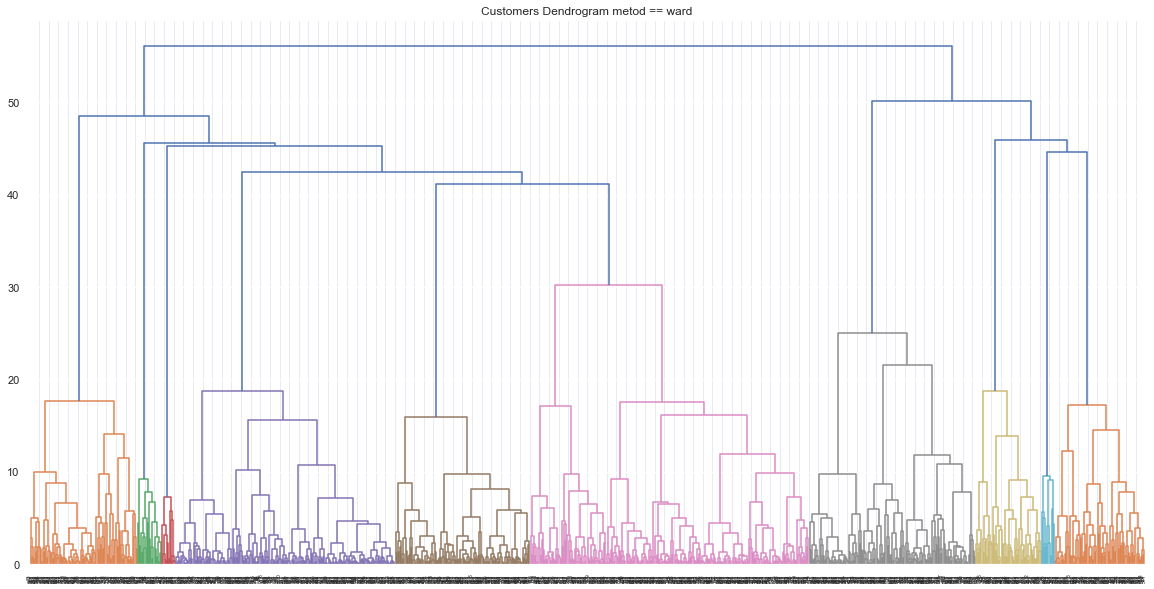

In [63]:
make_dendro(Etalon_no_SA_CA_oh_en_no_risk_scale)

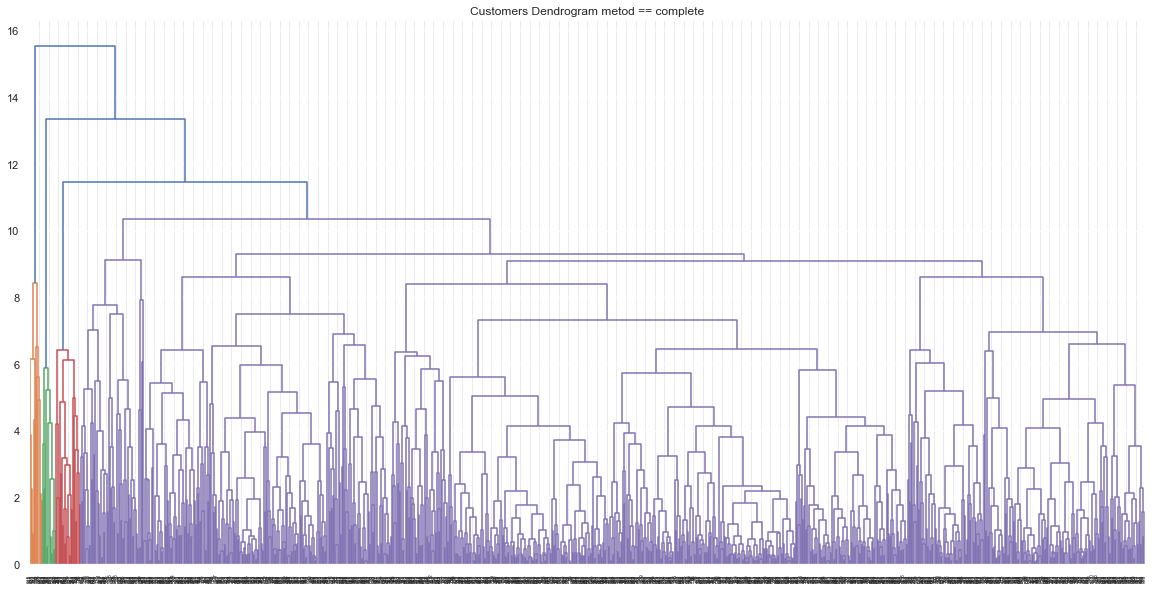

In [64]:
make_dendro(Etalon_no_SA_CA_oh_en_no_risk_scale, method='complete')

Ward кластеризует заметно лучше, чем complete, попробую на него ориентироваться определяя количество кластеров.

In [65]:
plt.show()
silhouette = []
for i in tqdm(range(2, 15)):
    agg = AgglomerativeClustering(n_clusters=i).fit(Etalon_no_SA_CA_oh_en_no_risk_scale)
    labels = agg.labels_
    score = silhouette_score(Etalon_no_SA_CA_oh_en_no_risk_scale, labels)
    silhouette.append(score)

100%|██████████| 13/13 [00:00<00:00, 27.20it/s]


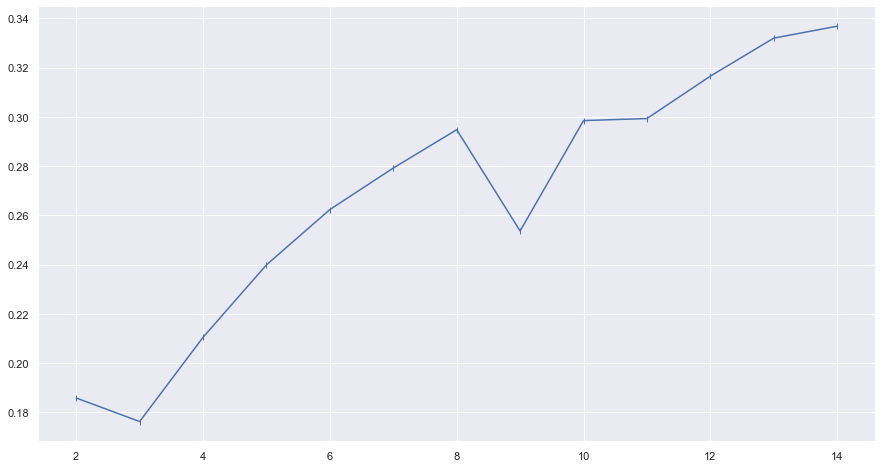

In [66]:
plt.plot(range(2,15), silhouette, marker='|')

Нарисуем графики с применением линкеджа Ward

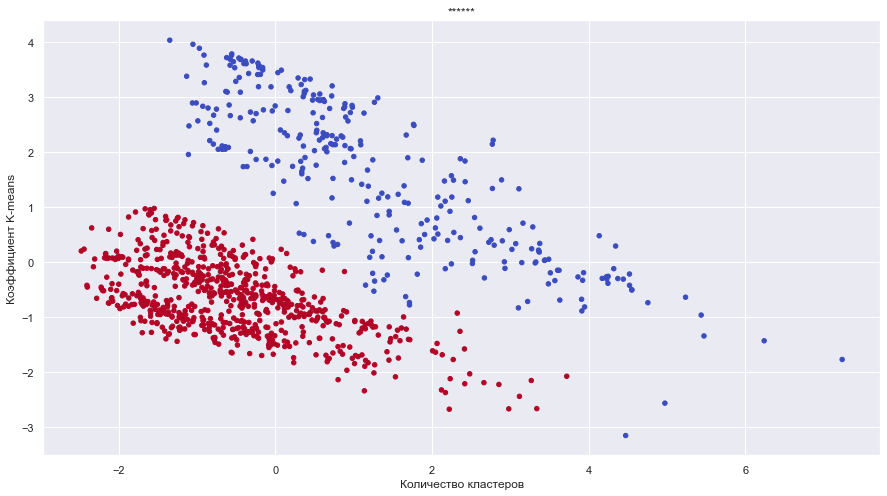

In [181]:
make_2D_plot_hierarhical(Etalon_no_SA_CA_oh_en_no_risk_scale_PCA, n=2, link='ward')

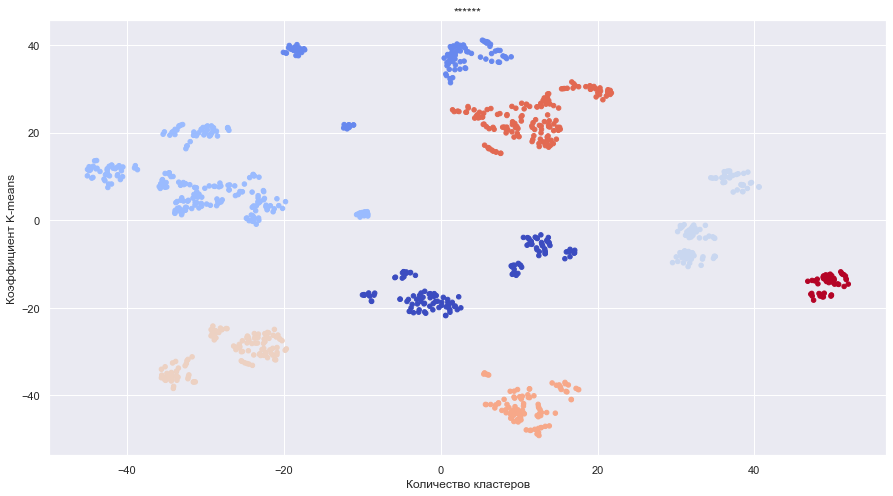

In [103]:
make_2D_plot_hierarhical(Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE, n=8, link='ward')

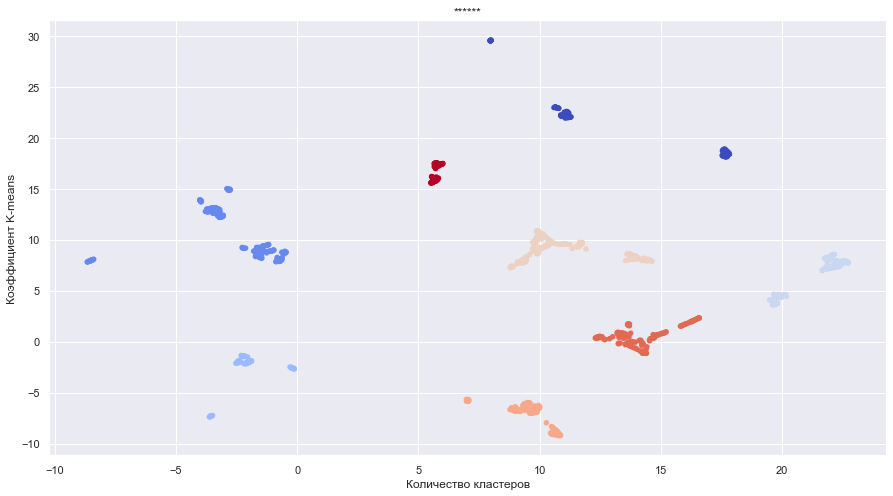

In [104]:
make_2D_plot_hierarhical(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP, n=8, link='ward')

Нарисуем графики с применением линкеджа complete

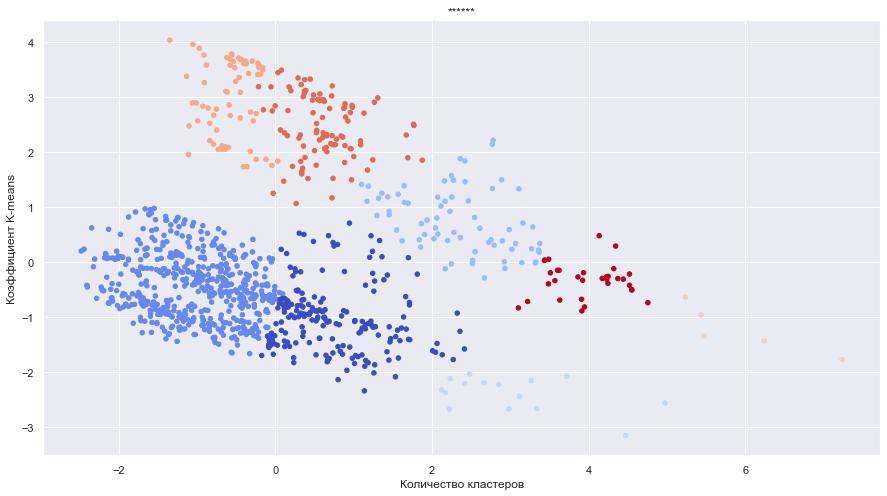

In [112]:
make_2D_plot_hierarhical(Etalon_no_SA_CA_oh_en_no_risk_scale_PCA, n=8, link='complete')

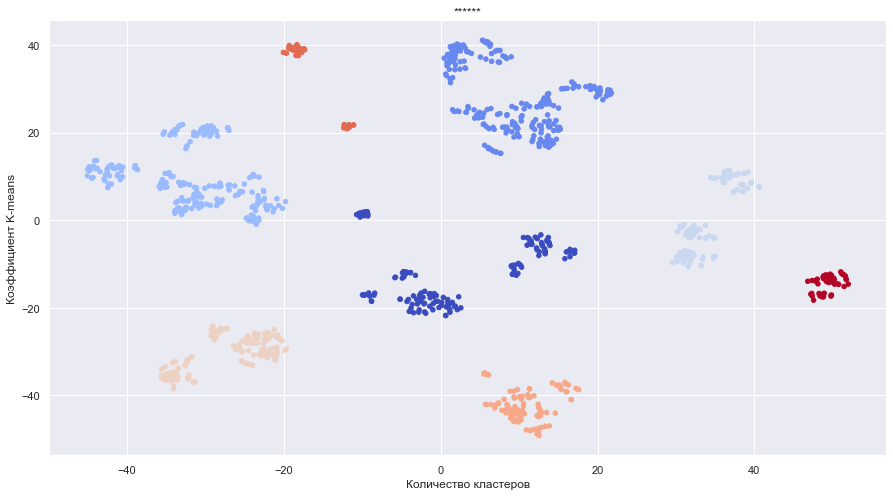

In [106]:
make_2D_plot_hierarhical(Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE, n=8, link='complete')

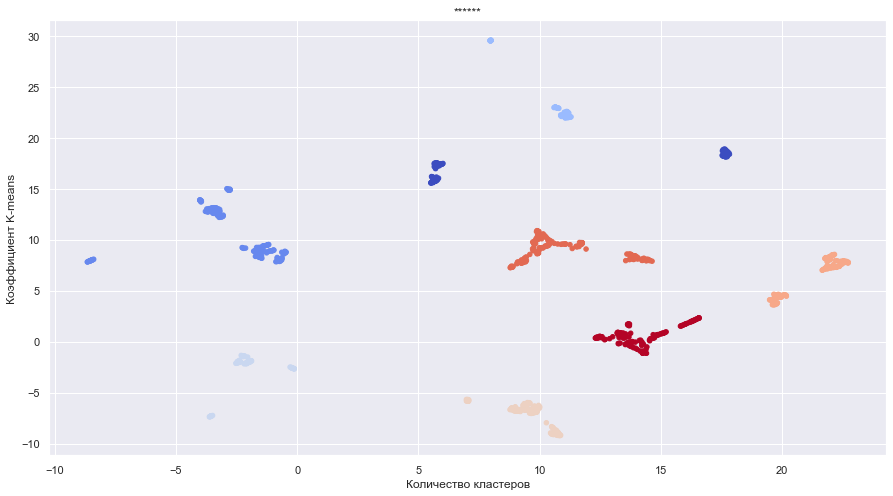

In [107]:
make_2D_plot_hierarhical(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP, n=8, link='complete')

# Часть 3. Интерпретация.

графики, построенные с применением Ward хорошо поддаются кластеризации, как на целевые 2 кластера. так и на показаные силуетом 8 (за исключением метода уменьшения размерности РСА)

In [168]:
agg = AgglomerativeClustering(n_clusters=8, linkage='ward').fit(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP)
labels = agg.labels_

In [169]:
inversed = make_scale(Etalon_no_SA_CA_oh_en_no_risk, inv=1)

In [170]:
Inversed_Etalon_df = pd.DataFrame(inversed, columns=Etalon_no_SA_CA_oh_en_no_risk.columns)
Inversed_Etalon_df['labels'] = labels

In [171]:
Inversed_Etalon_df

,Age,Sex,Job,Credit_amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,labels
0,67.000,1.000,2.000,1169.000,6.000,0.000,1.000,0.000,0.000,0.000,0.000,-0.000,0.000,1.000,0.000,0.000,6
1,22.000,0.000,2.000,5951.000,48.000,0.000,1.000,0.000,0.000,0.000,0.000,-0.000,0.000,1.000,0.000,0.000,3
2,49.000,1.000,1.000,2096.000,12.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,2
3,45.000,1.000,2.000,7882.000,42.000,1.000,0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000,1
4,53.000,1.000,2.000,4870.000,24.000,1.000,0.000,0.000,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.000,0.000,1.000,1736.000,12.000,0.000,1.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,0.000,0.000,5
996,40.000,1.000,3.000,3857.000,30.000,0.000,1.000,0.000,0.000,1.000,0.000,-0.000,0.000,0.000,0.000,0.000,4
997,38.000,1.000,2.000,804.000,12.000,0.000,1.000,0.000,0.000,0.000,0.000,-0.000,0.000,1.000,0.000,0.000,6
998,23.000,1.000,2.000,1845.000,45.000,1.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,1.000,0.000,0.000,1


In [172]:
sns.set(rc={"figure.figsize":( 10, 6 )})

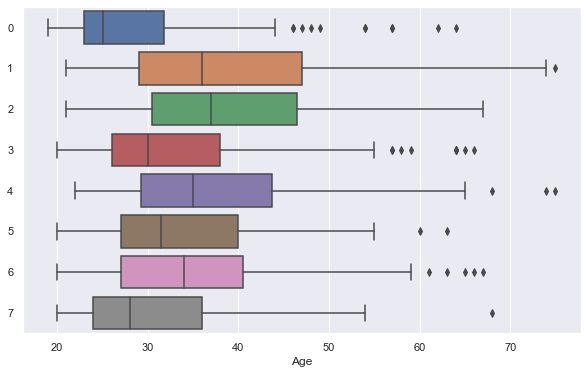

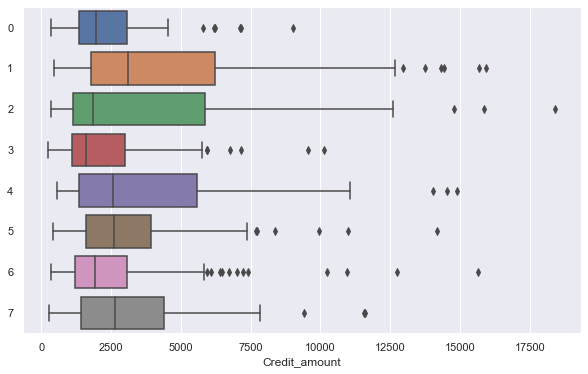

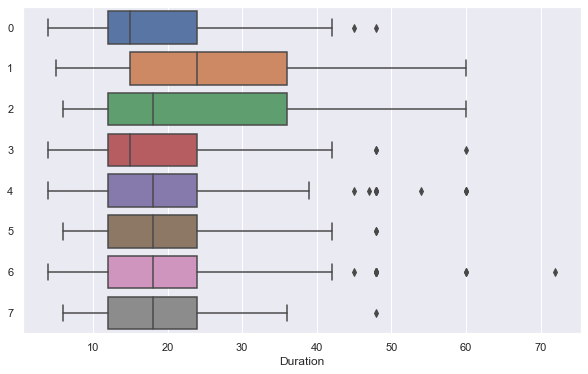

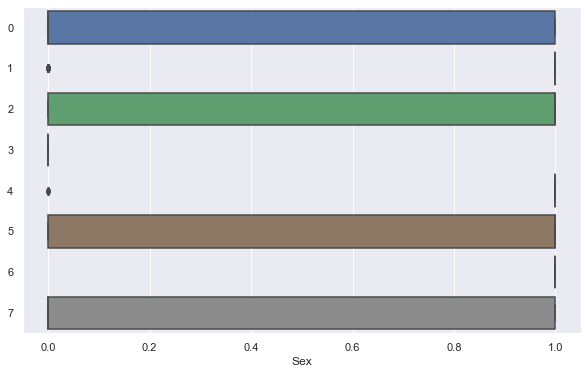

In [173]:
for col in Inversed_Etalon_df[['Age', 'Credit_amount', 'Duration', 'Sex']].columns:
    sns.boxplot(data=Inversed_Etalon_df, x=col, y=labels, orient='h')
    plt.show()

In [177]:
Inversed_Etalon_df[['Age', 'Credit_amount', 'Duration', 'Job', 'labels', 'Sex']].groupby('labels').mean().T.round(2)

labels,0,1,2,3,4,5,6,7
Age,29.520,39.220,38.560,33.910,37.250,33.670,35.760,31.170
Credit_amount,2372.240,4327.950,3780.070,2272.960,3695.740,3107.460,2553.750,3487.970
Duration,17.540,25.790,21.820,18.090,20.610,19.930,20.470,18.400
Job,1.880,2.000,1.960,1.770,1.930,1.920,1.870,1.810
Sex,0.430,0.820,0.620,0.000,0.950,0.690,1.000,0.490


При разделении на 2 кластера, к сожалению, определить по каким именно критериям делятся данные не получается.
При делении на 8 кластеров - скорее всего алгоритм ориентируется на возраст, на размер кредита и на пол.